In [1]:
import csv
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard,EarlyStopping,CSVLogger
from keras.models import Sequential,load_model
from keras.layers import Input,Lambda
from keras.layers.noise import GaussianNoise
from keras.layers.core import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv2D,Cropping2D
from keras.layers.pooling import MaxPooling2D

Using TensorFlow backend.


In [2]:
import sklearn

records=[]
paths=[]
imgs=[]
angels=[]
adj=0.2

with open('./data/driving_log.csv') as csvf:
    cr=csv.reader(csvf,delimiter=',')
    for record in cr:
        records.append(record)
print(len(records))

def generator(records,batch_size=32):
    total=len(records)
    root='./data/IMG/'
    while 1:
        sklearn.utils.shuffle(records)            
        for offset in range(0,total,batch_size):
            batch_record=records[offset:offset+batch_size]
            imgs=[]
            angels=[]
            for record in batch_record:
                csteering=float(record[3])
                lsteering=csteering+adj
                rsteering=csteering-adj
                
                imgname=record[0].replace(' ','').split('/')[-1]
                path=root+imgname
                img=cv2.imread(path)
                if(img is not None):
                    imgs.append(img)
                    angels.append(csteering)
                    img=np.fliplr(img)
                    imgs.append(img)
                    angels.append(-csteering)
        
                imgname=record[1].replace(' ','').split('/')[-1]
                path=root+imgname
                img=cv2.imread(path)
                if(img is not None):
                    imgs.append(img)
                    angels.append(lsteering)
                    img=np.fliplr(img)
                    imgs.append(img)
                    angels.append(-lsteering)
        
                imgname=record[2].replace(' ','').split('/')[-1]
                path=root+imgname
                img=cv2.imread(path)
                if(img is not None):
                    imgs.append(img)            
                    angels.append(rsteering)
                    img=np.fliplr(img)
                    imgs.append(img)
                    angels.append(-rsteering)
            
            batch_x=np.array(imgs)
            batch_y=np.array(angels)
            yield sklearn.utils.shuffle(batch_x, batch_y)

3039


In [3]:
from sklearn.model_selection import train_test_split
train_example,valid_example=train_test_split(records,test_size=0.2)
train_generator=generator(train_example,batch_size=32)
valid_generator=generator(valid_example,batch_size=32)

In [116]:
img_batch=[]
imgfile='./data/IMG/'+records[0][0].replace(' ','').split('/')[-1]
angel=csteering=float(record[3])
img=img=cv2.imread(imgfile)
print(img.shape)
print('angel:',angel)
for i in range(10):
    img_batch.append(img)
x_t=np.array(img_batch)

(160, 320, 3)
angel: 0.0


In [60]:
model1=Sequential()
model1.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
#model.add(GaussianNoise(stddev=1.))
model1.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
#model.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
model1.add(Conv2D(3,kernel_size=(3,3)))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [63]:
model2=Sequential()
model2.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
#model.add(GaussianNoise(stddev=1.))
model2.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model2.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(3,kernel_size=(3,3)))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [66]:
model3=Sequential()
model3.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
#model.add(GaussianNoise(stddev=1.))
model3.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model3.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(3,kernel_size=(3,3)))
model3.add(MaxPooling2D())
#model.add(Dropout(0.2))
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [69]:
model4=Sequential()
model4.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
#model.add(GaussianNoise(stddev=1.))
model4.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model4.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
#model.add(Conv2D(3,kernel_size=(3,3)))
model4.add(MaxPooling2D())
model4.add(Dropout(0.2))
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [70]:
conv_road=model.predict(x_t)

(10, 78, 278, 3)


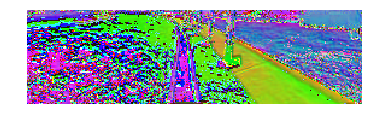

In [62]:
#model1
%matplotlib inline
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

(10, 78, 278, 3)


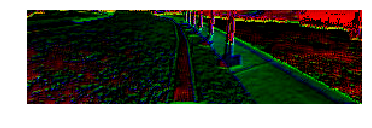

In [65]:
#model2
%matplotlib inline
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

(10, 39, 139, 3)


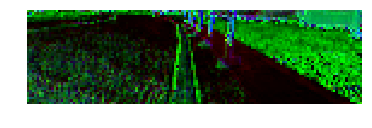

In [68]:
#model3
%matplotlib inline
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

(10, 39, 139, 3)


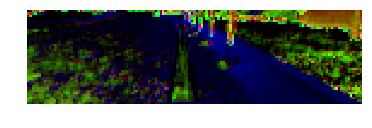

In [71]:
#model4
%matplotlib inline
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

In [75]:
model5=Sequential()
model5.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
model5.add(GaussianNoise(stddev=1.))
model5.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model5.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
model5.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [76]:
conv_road=model5.predict(x_t)

(10, 18, 68, 3)


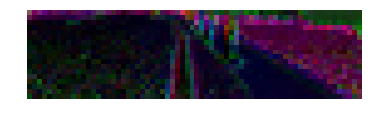

In [77]:
#model5
%matplotlib inline
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

In [80]:
model6=Sequential()
model6.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
model6.add(GaussianNoise(stddev=1.))
model6.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model6.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.2))
model6.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.2))
model6.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [81]:
conv_road=model6.predict(x_t)

(10, 8, 33, 3)


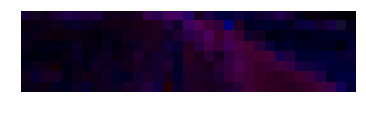

In [87]:
#model6
%matplotlib inline
plt.figure(figsize=(6,6))
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i])

In [110]:
model7=Sequential()
model7.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
model7.add(GaussianNoise(stddev=1.))
model7.add(Cropping2D(cropping=((60,20),(20,20)),input_shape=(160,320,3)))
model7.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
model7.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
model7.add(Conv2D(3,kernel_size=(3,3),activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(400))
#model.add(Dense(100))
#model.add(Dense(1))
#model.compile(optimizer='adam',loss='mse')

In [111]:
conv_road=model7.predict(x_t)

(10, 74, 274, 3)


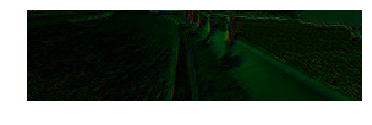

In [112]:
#model7
%matplotlib inline
plt.figure(figsize=(6,6))
print(conv_road.shape)
plt.axis('off')
plt.imshow(conv_road[i],cmap='gray')

In [140]:
model8=Sequential()
model8.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
model8.add(GaussianNoise(stddev=1.))
model8.add(Cropping2D(cropping=((80,30),(0,0)),input_shape=(160,320,3)))
model8.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model8.add(MaxPooling2D())
model8.add(Dropout(0.2))
model8.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model8.add(MaxPooling2D())
model8.add(Dropout(0.2))
#    model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#    model.add(MaxPool2D())
#    model.add(Dropout(0.2))
model8.add(Flatten())
model8.add(Dense(400))
model8.add(Dense(100))
model8.add(Dense(1))
model8.compile(optimizer='adam',loss='mse')

In [141]:
pangel=model8.predict(x_t)

In [142]:
print('rangel:',angel)
print('pangel:',pangel[0])

rangel: 0.0
pangel: [-0.0768208]


In [137]:
#final model
model=Sequential()
model.add(Lambda(lambda x:x/127.5-1.,
                input_shape=(160,320,3),
                output_shape=(160,320,3)))
model.add(GaussianNoise(stddev=1.))
model.add(Cropping2D(cropping=((80,30),(0,0)),input_shape=(160,320,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(400))
model.add(Dense(100))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [138]:
pangel=model.predict(x_t)

In [139]:
print('rangel:',angel)
print('pangel:',pangel[0])

rangel: 0.0
pangel: [ 0.02759849]


In [5]:
tb=TensorBoard(log_dir='./logs',histogram_freq=len(train_example)/100,write_images=True)
#tb.set_model(model)
es=EarlyStopping(monitor='val_loss',min_delta=0.002,patience=3)
cl=CSVLogger(filename='t.log',separator=',')

In [7]:
steps_per_epoch=int(len(train_example)/100)
nb_val_samples=int(len(valid_example)/100)

history=model.fit_generator(train_generator,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=valid_generator,
                            nb_val_samples=nb_val_samples,
                            nb_epoch=1,
                            callbacks=[tb,es,cl])
model.save('./model.h5')

/Users/i201314/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=19, callbacks=[<keras.ca..., epochs=32, steps_per_epoch=75)`
  '` call to the Keras 2 API: ' + signature)


INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_2/kernel:0 is illegal; using conv2d_2/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_2/kernel:0 is illegal; using conv2d_2/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_2/bias:0 is illegal; using conv2d_2/bias_0 instead.
INFO:tensorflow:Summary name conv2d_2/bias:0 is illegal; using conv2d_2/bias_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflo

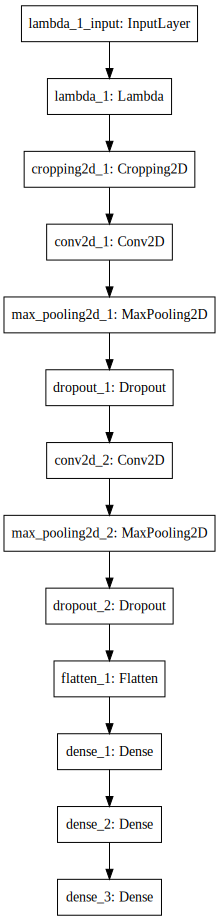

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(model,to_file='model.png')
SVG(model_to_dot(model).create(prog='dot',format='svg'))

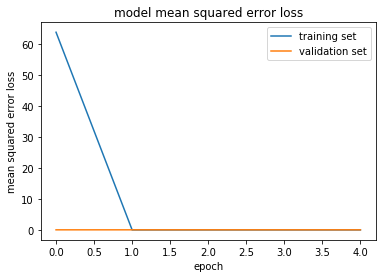

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()